# Feature Scaling - Normalization:

`Normalization` refers to a feature scaling technique where features are transformed to have a similar scale, usually by adjusting    
their values to fall within a specific range (like 0 to 1), ensuring that no single feature dominates the others due to its magnitude.


## Types of Normalization

![min-max](images/types%20of%20normalization.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/2. Data_for_Normaization.csv')

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.518868,72.341163,74.604843
1,female,group C,some college,standard,completed,69.372786,90.693512,88.434536
2,female,group B,master's degree,standard,none,90.747297,95.972689,93.364383
3,male,group A,associate's degree,free/reduced,none,47.311826,57.336038,44.197319
4,male,group C,some college,standard,none,76.948720,78.920104,75.317157
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.578152,99.461313,95.695893
996,male,group C,high school,free/reduced,none,62.229588,55.106847,55.988351
997,female,group C,high school,free/reduced,completed,59.532228,71.709248,65.408511
998,female,group D,some college,standard,completed,68.234389,78.607313,77.960825


In [7]:
df = df.iloc[:,[1,5,6,7]]

In [8]:
df.sample(3)

,race/ethnicity,math score,reading score,writing score
961,group D,48.342218,54.495135,53.947041
154,group D,62.384771,67.876768,61.734108
676,group E,73.675018,78.509826,76.294274


In [10]:
df.rename(columns={'race/ethnicity' : 'groups'},inplace=True)

C:\Users\anike\AppData\Local\Temp\ipykernel_9900\2506658859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'race/ethnicity' : 'groups'},inplace=True)


In [22]:
df.sample()

,groups,math score,reading score,writing score
150,group A,62.938957,67.087697,69.060984


## Distibution of individual features:

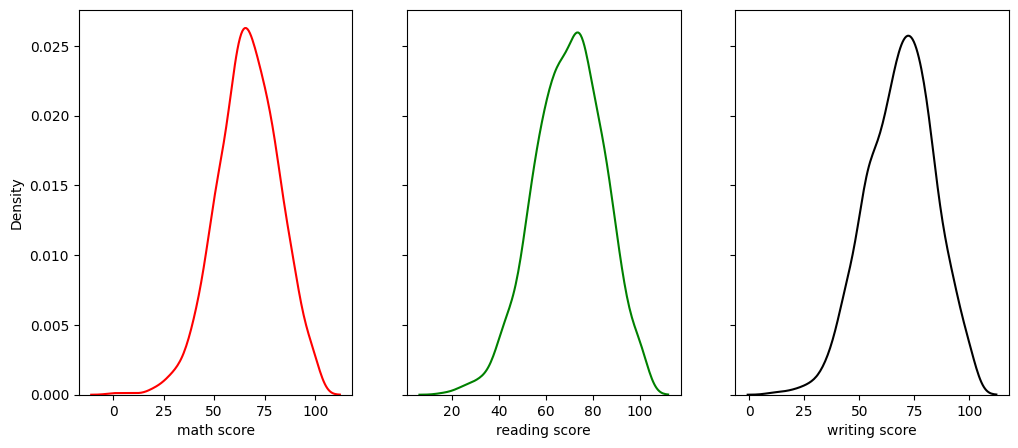

In [19]:
fig,ax=plt.subplots(1,3,figsize=(12,5),sharey=True)
col = ['math score','reading score','writing score']
color = ['red','green','black']
for i in range(3):
    sns.kdeplot(df[col[i]],ax=ax[i],color=color[i])
plt.show()

## Relationship between each feature to every other feature:

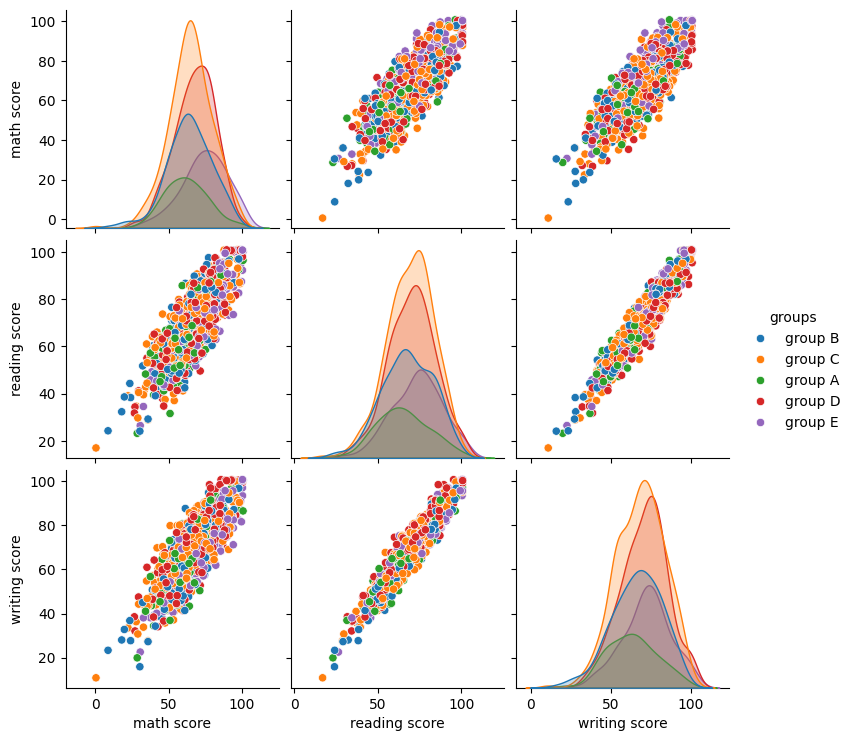

In [23]:
sns.pairplot(df,hue='groups')

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
x = df.drop('groups', axis=1)
y = df['groups']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((700, 3), (300, 3))

## 1. MinMaxScaler

Min-max normalization is a linear transformation that scales data values to a range of 0 to 1.

![min-max](images/min%20max%20scaling.png)

In [27]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()

# fit the s to the train set, it will learn the parameters
s.fit(X_train)

# transform train and test sets
X_train_s = s.transform(X_train)
X_test_s = s.transform(X_test)

In [28]:
X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_s = pd.DataFrame(X_test_s, columns=X_test.columns)

In [29]:
np.round(X_train.describe(), 1)

,math score,reading score,writing score
count,700.0,700.0,700.0
mean,66.7,69.7,68.5
std,15.5,14.8,15.5
min,0.6,17.0,10.8
25%,56.6,59.3,57.2
50%,66.2,70.7,69.3
75%,77.7,80.5,79.1
max,100.8,101.0,100.7


In [30]:
np.round(X_train_s.describe(), 1)

,math score,reading score,writing score
count,700.0,700.0,700.0
mean,0.7,0.6,0.6
std,0.2,0.2,0.2
min,0.0,0.0,0.0
25%,0.6,0.5,0.5
50%,0.7,0.6,0.7
75%,0.8,0.8,0.8
max,1.0,1.0,1.0


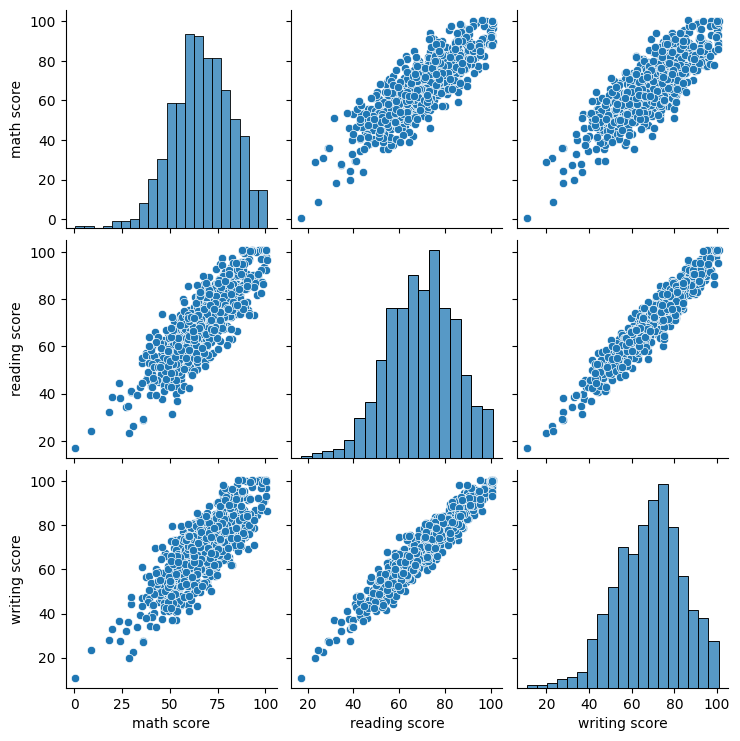

In [ ]:
# Relationship between features before scaling.

sns.pairplot(X_train)

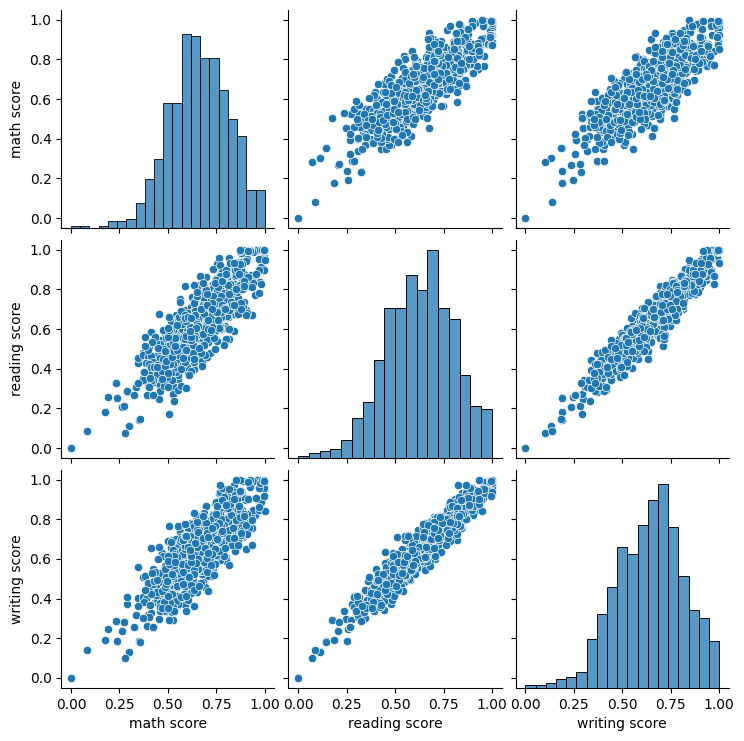

In [ ]:
# Relationship between features after scaling.

sns.pairplot(X_train_s)

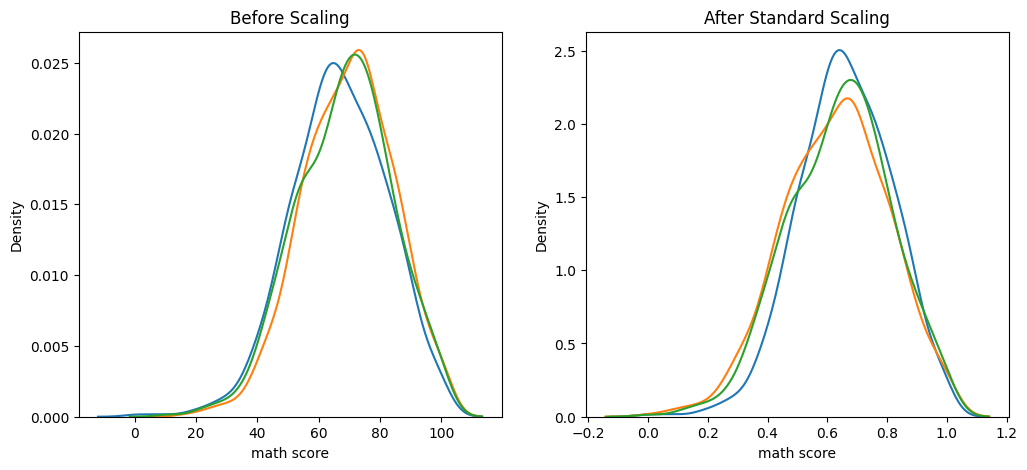

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['math score'], ax=ax1)
sns.kdeplot(X_train['reading score'], ax=ax1)
sns.kdeplot(X_train['writing score'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_s['math score'], ax=ax2)
sns.kdeplot(X_train_s['reading score'], ax=ax2)
sns.kdeplot(X_train_s['writing score'], ax=ax2)
plt.show()

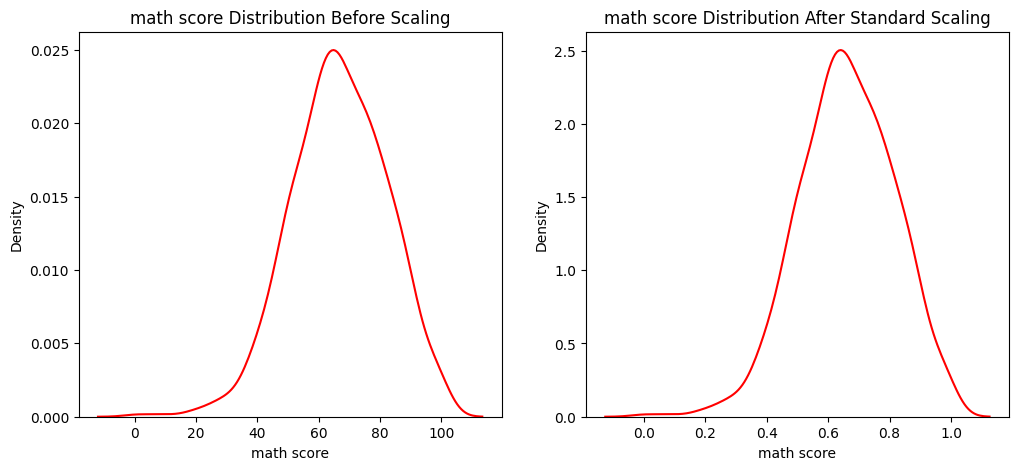

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('math score Distribution Before Scaling')
sns.kdeplot(X_train['math score'], ax=ax1,color='r')

# after scaling
ax2.set_title('math score Distribution After Standard Scaling')
sns.kdeplot(X_train_s['math score'], ax=ax2,color='r')
plt.show()

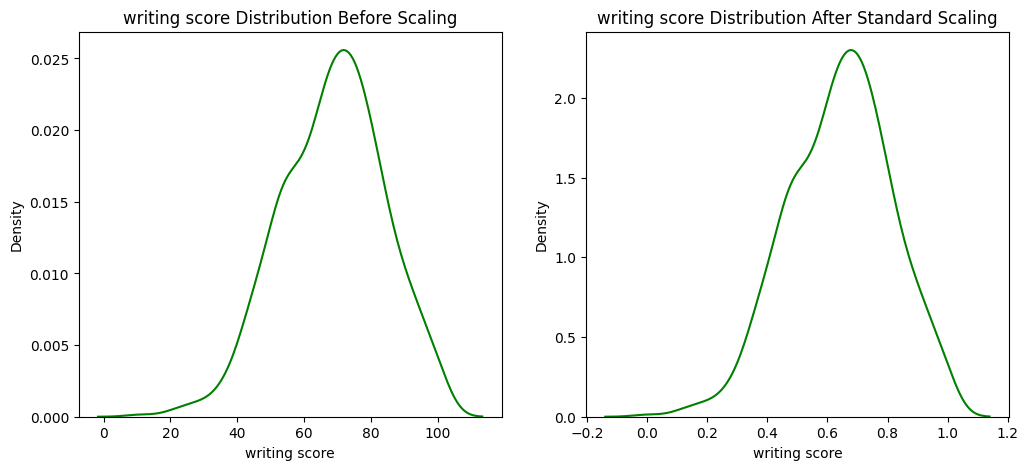

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('writing score Distribution Before Scaling')
sns.kdeplot(X_train['writing score'], ax=ax1,color='g')

# after scaling
ax2.set_title('writing score Distribution After Standard Scaling')
sns.kdeplot(X_train_s['writing score'], ax=ax2,color='g')
plt.show()

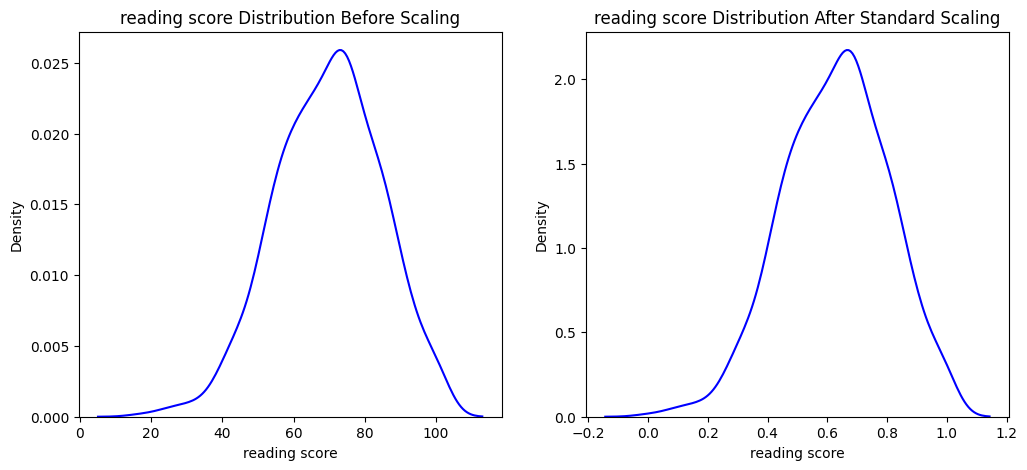

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('reading score Distribution Before Scaling')
sns.kdeplot(X_train['reading score'], ax=ax1,color='b')

# after scaling
ax2.set_title('reading score Distribution After Standard Scaling')
sns.kdeplot(X_train_s['reading score'], ax=ax2,color='b')
plt.show()

## 2. Mean Normalization:

`Mean normalization` in feature scaling refers to the process of subtracting the mean value of a feature from each data point in that feature, effectively centering the data around zero.

![](images/mean-normalization.jpg)

## 3. Max Absolute Scaling:

- `Max Abs Scaling` is a technique that normalizes numerical features by dividing each value by the maximum absolute value of the feature. 
- The resulting values will be between -1 and 1. 
- The sign of the values is preserved, meaning positive and negative values retain their original polarity

![](images/max%20abs%20scaling.jpg)

## 3. Robust Scaling:

- `Robust scaling` is a method of feature scaling that uses the median and interquartile range (IQR) to handle outliers.
- It's useful for datasets with skewed or anomalous values.
- Robust scaling is more effective at handling outliers than normalization or standardization.

![](images/robust%20scaling.png)

In [58]:
temp_df = pd.DataFrame({'groups':['group A','group C','group A'],'math score':[160,20,10],'writing score':[250,20,5],'reading score':[5,3,300]})

In [59]:
temp_df

,groups,math score,writing score,reading score
0,group A,160,250,5
1,group C,20,20,3
2,group A,10,5,300


In [60]:
new_df = pd.concat([df,temp_df],ignore_index=True)

In [61]:
new_df

,groups,math score,reading score,writing score
0,group B,72.518868,72.341163,74.604843
1,group C,69.372786,90.693512,88.434536
2,group B,90.747297,95.972689,93.364383
3,group A,47.311826,57.336038,44.197319
4,group C,76.948720,78.920104,75.317157
...,...,...,...,...
998,group D,68.234389,78.607313,77.960825
999,group D,77.652687,86.914925,86.684998
1000,group A,160.000000,5.000000,250.000000
1001,group C,20.000000,3.000000,20.000000


Train test split

In [63]:
from sklearn.model_selection import train_test_split
new_x = new_df.drop('groups', axis=1)
new_y = new_df['groups']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x,new_y,test_size=0.3,random_state=0)
new_X_train.shape, new_X_test.shape

((702, 3), (301, 3))

In [64]:
from sklearn.preprocessing import RobustScaler

new_s = RobustScaler()

# fit the s to the train set, it will learn the parameters
new_s.fit(new_X_train)

# transform train and test sets
new_X_train_s = s.transform(new_X_train)
new_X_test_s = s.transform(new_X_test)

In [65]:
new_X_train_s = pd.DataFrame(new_X_train_s, columns=new_X_train.columns)
new_X_test_s = pd.DataFrame(new_X_test_s, columns=new_X_test.columns)

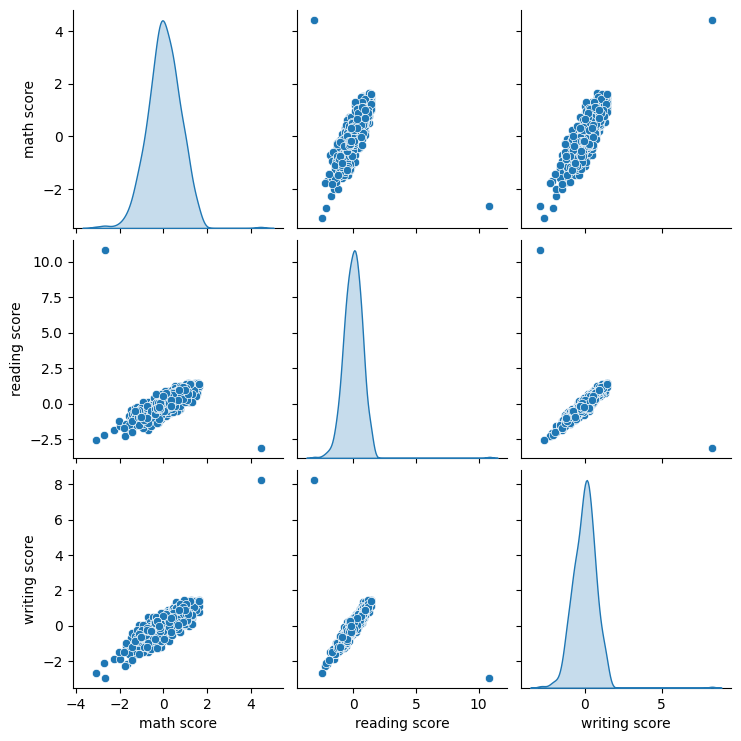

In [67]:
sns.pairplot(new_X_train_s,diag_kind='kde')